<a href="https://colab.research.google.com/github/Fepenninck/Compara-o_de_KFold_e_StratifiedKFold_no_SVM/blob/main/Compara%C3%A7%C3%A3o_de_KFold_e_StratifiedKFold_no_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimensão do dataset: (768, 9)


,NumGravidez,Glicose,Pressao,EspessuraPele,Insulina,IMC,Pedigree,Idade,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Distribuição das classes:
Outcome
0    500
1    268
Name: count, dtype: int64


/tmp/ipython-input-1711086173.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=dados, palette="Blues")


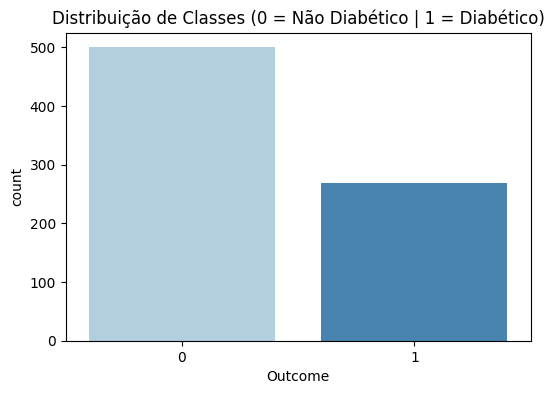

Acurácia média KFold:  0.7642686261107314
Desvio padrão KFold:  0.057362498929811434

Acurácia média StratifiedKFold:  0.7707792207792208
Desvio padrão StratifiedKFold:  0.023911626804574


/tmp/ipython-input-1711086173.py:75: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([resultados_kfold, resultados_skfold],


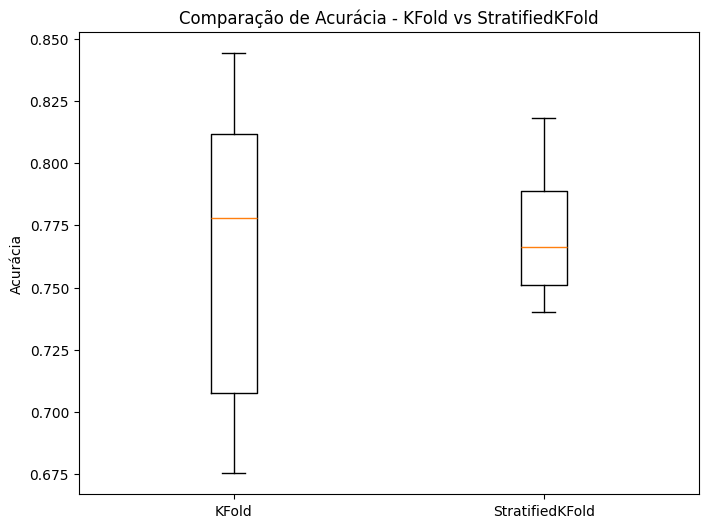


=== Resultados do Modelo Final ===
Acurácia: 0.7272727272727273

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       150
           1       0.65      0.49      0.56        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



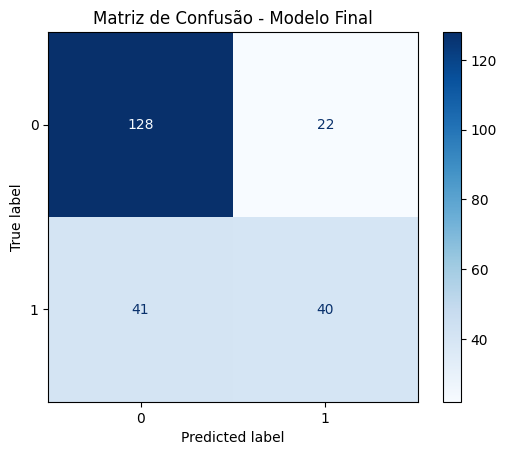

In [3]:
# ============================================================
# Comparação de KFold e StratifiedKFold com SVM
# Autor: Thiago dos Santos Soares
# Descrição: Este notebook compara a acurácia do SVM usando
# validação cruzada simples (KFold) e estratificada (StratifiedKFold).
# ============================================================

# ======================
# 1. Importação das bibliotecas
# ======================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

# ======================
# 2. Carregamento da base de dados
# ======================
# Dataset Pima Indians Diabetes
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
colunas = ["NumGravidez","Glicose","Pressao","EspessuraPele",
           "Insulina","IMC","Pedigree","Idade","Outcome"]

dados = pd.read_csv(url, names=colunas)

print("Dimensão do dataset:", dados.shape)
display(dados.head())

# ======================
# 3. Análise exploratória inicial
# ======================
print("\nDistribuição das classes:")
print(dados["Outcome"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x="Outcome", data=dados, palette="Blues")
plt.title("Distribuição de Classes (0 = Não Diabético | 1 = Diabético)")
plt.show()

# ======================
# 4. Separação de Features e Target
# ======================
X = dados.drop("Outcome", axis=1)
y = dados["Outcome"]

# ======================
# 5. KFold (10 divisões)
# ======================
kf = KFold(n_splits=10, shuffle=True, random_state=42)
modelo = SVC(kernel="linear", random_state=42)

resultados_kfold = cross_val_score(modelo, X, y, cv=kf, scoring="accuracy")

print("Acurácia média KFold: ", resultados_kfold.mean())
print("Desvio padrão KFold: ", resultados_kfold.std())

# ======================
# 6. StratifiedKFold (10 divisões)
# ======================
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

resultados_skfold = cross_val_score(modelo, X, y, cv=skf, scoring="accuracy")

print("\nAcurácia média StratifiedKFold: ", resultados_skfold.mean())
print("Desvio padrão StratifiedKFold: ", resultados_skfold.std())

# ======================
# 7. Comparação gráfica
# ======================
plt.figure(figsize=(8,6))
plt.boxplot([resultados_kfold, resultados_skfold],
            labels=["KFold", "StratifiedKFold"])
plt.title("Comparação de Acurácia - KFold vs StratifiedKFold")
plt.ylabel("Acurácia")
plt.show()

# ======================
# 8. Treinamento do modelo final (com StratifiedKFold, mais robusto)
# ======================
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

modelo_final = SVC(kernel="linear", random_state=42)
modelo_final.fit(X_train, y_train)

y_pred = modelo_final.predict(X_test)

print("\n=== Resultados do Modelo Final ===")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_final.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão - Modelo Final")
plt.show()
